# Imports

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Data Preparation

Read in the .csv data sets

In [170]:
df = pd.read_csv("../cleanData/cleanChargingDataFull.csv")
wd = pd.read_csv("../data preparation/cleanWeatherData.csv")

Transform and add data to the dataframe

In [171]:
# Transform dates from string to datetime objects
date_columns = ["connectionTime", "disconnectTime", "doneChargingTime"]
for date_column in date_columns:
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

#Add column for duration of the session (based on connection duration, not charging duration)
df["connectionDuration"] = (df["disconnectTime"] - df["connectionTime"]).map(lambda x: x.seconds/3600)

#Add column for weekday of session (based on connectionTime Timestamp)
df["date"] = df["connectionTime"].map(lambda x: x.date())
df["year"] = df["connectionTime"].map(lambda x: x.year)
df["month"] = df["connectionTime"].map(lambda x: x.month)
df["weekday"] = df["connectionTime"].map(lambda x: x.weekday())
df["hour"] = df["connectionTime"].map(lambda x: x.hour)
df["hour_disconnect"] = df["disconnectTime"].map(lambda x: x.hour)

C:\Users\Felix\AppData\Local\Temp\ipykernel_29432\2614822541.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\Felix\AppData\Local\Temp\ipykernel_29432\2614822541.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\Felix\AppData\Local\Temp\ipykernel_29432\2614822541.py:4: FutureWarning: In a f

In [172]:
# Create arrays for weekdays and months for later plots
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Split the data by sites

In [173]:
df1 = df[df["siteID"] == 1]
df2 = df[df["siteID"] == 2]

Aggregate data into pandas.groupby objects

In [174]:
#Group the data by weekday
df_grouped_weekday = df.groupby("weekday")
df1_grouped_weekday = df1.groupby("weekday")
df2_grouped_weekday = df2.groupby("weekday")

#Group the data by hour of the connection time
df_grouped_hour = df.groupby("hour")
df1_grouped_hour = df1.groupby("hour")
df2_grouped_hour = df2.groupby("hour")

#Group the data by hour of the disconnect time
df_grouped_hour_disconnect = df.groupby("hour_disconnect")
df1_grouped_hour_disconnect = df1.groupby("hour_disconnect")
df2_grouped_hour_disconnect = df2.groupby("hour_disconnect")

#Group the data by month of the connection time
df_grouped_month = df.groupby("month")
df1_grouped_month = df1.groupby("month")
df2_grouped_month = df2.groupby("month")

Function to save plots in dedicated directory

In [175]:
def create_folder(folder_name="plots"):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

create_folder()

In [176]:
def save_plot(p_fig):
    plot_name = p_fig.gca().get_title()
    folder = 'plots'
    file_path = os.path.join(folder, plot_name)
    p_fig.savefig(file_path, bbox_inches='tight')

# Patterns during a day 

This section analyzes the patterns in the charging data that occur within a single day.
Therefore, the following topics are covered:
1. Number of sessions started (per hour of the day) + Number of sessions started (per hour of the day) split by weekday
2. Ongoing sessions (per hour of the day)
3. Average connection duration of sessions started (per hour of the day)
4. Energy delivered (per hour of the day)
5. Energy requested (per hour of the day)

**1. Number of sessions started per hour of the day**

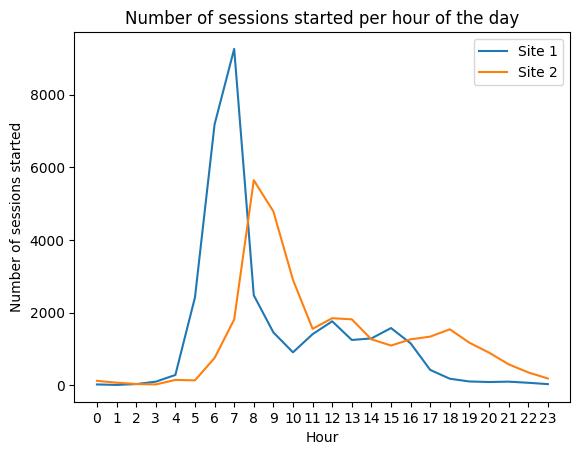

In [177]:
x = np.arange(24)
y1 = df1_grouped_hour[["id"]].size()
y2 = df2_grouped_hour[["id"]].size()

fig, ax = plt.subplots()
ax.plot(x, y1, label="Site 1")
ax.plot(x, y2, label="Site 2")
ax.set_xlabel("Hour")
ax.set_ylabel("Number of sessions started")
ax.set_xticks(x)
ax.set_title("Number of sessions started per hour of the day")
ax.legend()
fig.show

save_plot(fig)

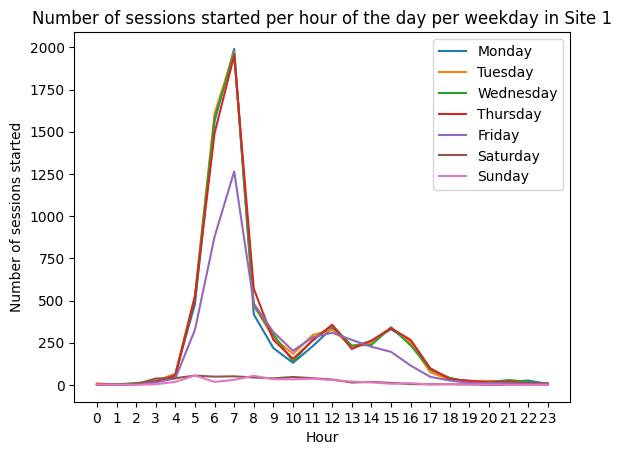

In [178]:
x = np.arange(24)
y_list = [0]*7

fig, ax = plt.subplots()

for w in range(0,7):
    y_list[w] = df1[df1.weekday == w].groupby("hour")[["hour"]].size()
    try:
        ax.plot(x, y_list[w], label=weekdays[w])
    except Exception:
        for i in range(0, 24):
            if i not in y_list[w].keys():
                y_list[w][i] = 0
        ax.plot(x, y_list[w], label=weekdays[w])

ax.set_xlabel("Hour")
ax.set_ylabel("Number of sessions started")
ax.set_xticks(x)
ax.set_title("Number of sessions started per hour of the day per weekday in Site 1")
ax.legend()

fig.show
save_plot(fig)

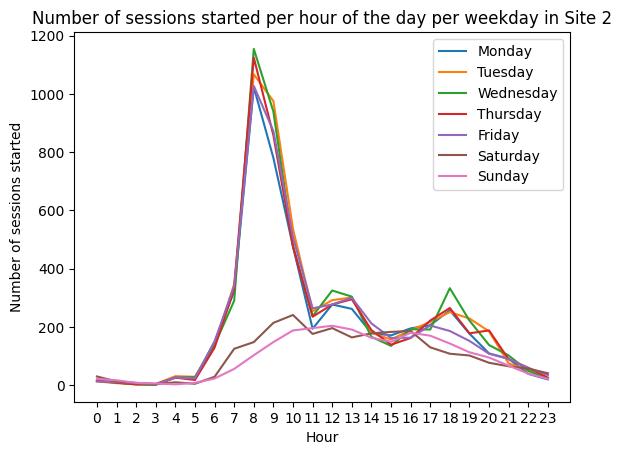

In [179]:
x = np.arange(24)
y_list = [0]*7

fig, ax = plt.subplots()

for w in range(0,7):
    y_list[w] = df2[df2.weekday == w].groupby("hour")[["hour"]].size()
    try:
        ax.plot(x, y_list[w], label=weekdays[w])
    except Exception:
        for i in range(0, 24):
            if i not in y_list[w].keys():
                y_list[w][i] = 0
        ax.plot(x, y_list[w], label=weekdays[w])

ax.set_xlabel("Hour")
ax.set_ylabel("Number of sessions started")
ax.set_xticks(x)
ax.set_title("Number of sessions started per hour of the day per weekday in Site 2")
ax.legend()

fig.show
save_plot(fig)

**2. Ongoing sessions per hour of the day**

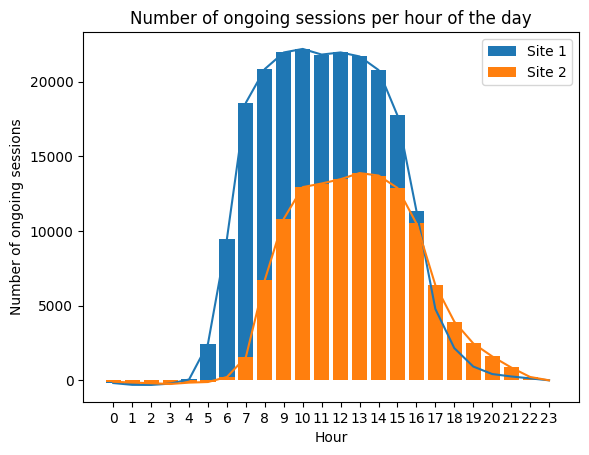

In [180]:
x = np.arange(24)
y1_start = df1_grouped_hour[["hour"]].size()
y2_start = df2_grouped_hour[["hour"]].size()
y1_end = df1_grouped_hour_disconnect[["hour_disconnect"]].size()
y2_end = df2_grouped_hour_disconnect[["hour_disconnect"]].size()
y1_start_cumsum = y1_start.cumsum()
y1_end_cumsum = y1_end.cumsum()
y1_com = y1_start_cumsum.sub(y1_end_cumsum)
y2_start_cumsum = y2_start.cumsum()
y2_end_cumsum = y2_end.cumsum()
y2_com = y2_start_cumsum.sub(y2_end_cumsum)

fig, ax = plt.subplots()
ax.plot(x, y1_com)
ax.bar(x, y1_com, label="Site 1")
ax.plot(x, y2_com)
ax.bar(x, y2_com, label="Site 2")

ax.set_xlabel("Hour")
ax.set_ylabel("Number of ongoing sessions")
ax.set_xticks(x)
ax.set_title("Number of ongoing sessions per hour of the day")
ax.legend()

fig.show
save_plot(fig)

**3. Average connection duration of sessions started per hour of the day**

In [181]:
# Statistics for the connection duration per hour of the day
df1_grouped_hour_statistics =  df1_grouped_hour["connectionDuration"].describe()
df2_grouped_hour_statistics =  df2_grouped_hour["connectionDuration"].describe()

Insights: <br><br> 
Site 1
- Relatively long duration of sessions started from 4am to 8am (on average 8-9 hours) --> Characteristic for a typical work day, indicating commercial use of site 1 <br>

Site 2
- Compared to site 1, relatively long duration of sessions started from 8pm to midnight --> Characteristic for a night of sleep, indicating private use


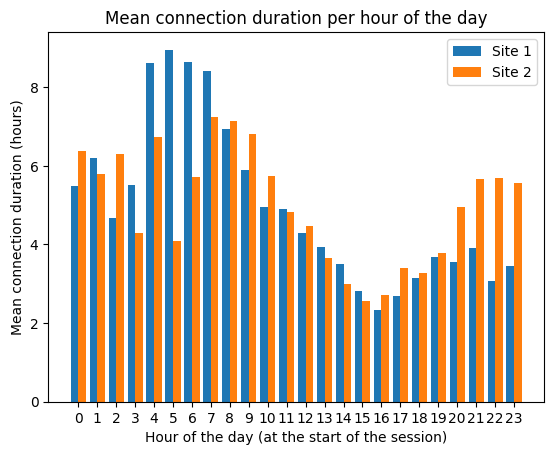

In [182]:
# Bar Charts plotting the mean connection duration per hour of the day
x = np.arange(24)
y1 = df1_grouped_hour_statistics["mean"]
y2 = df2_grouped_hour_statistics["mean"]

fig, ax2 = plt.subplots()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Mean connection duration per hour of the day")
ax2.set_xlabel("Hour of the day (at the start of the session)")
ax2.set_xticks(x)
ax2.set_ylabel("Mean connection duration (hours)")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))

fig.show
save_plot(fig)

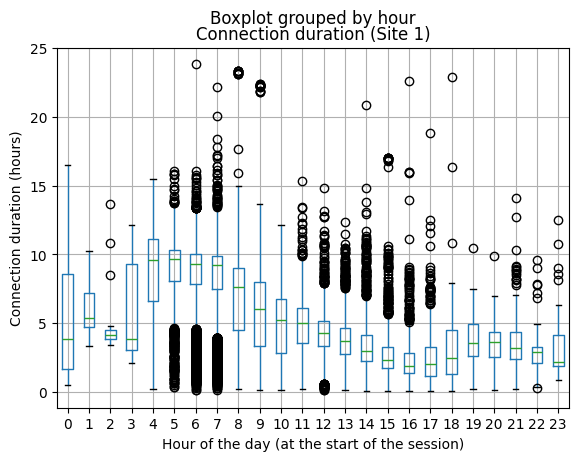

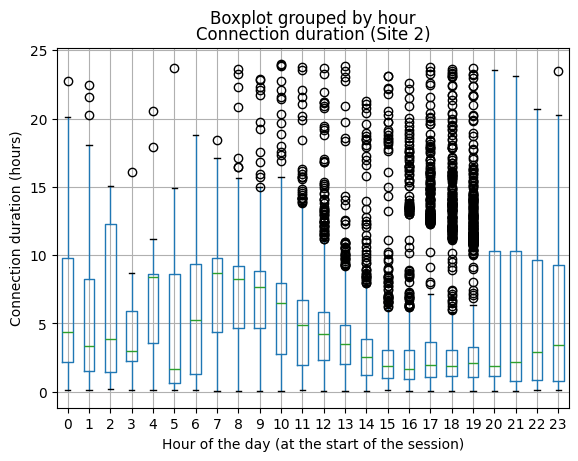

In [183]:
# Boxplots showing the average 25%, 50% and 75% marks of the connection durations per hour of the day
df1_connection_duration = df1[["hour", "connectionDuration"]]
df2_connection_duration = df2[["hour", "connectionDuration"]]

fig, ax3 = plt.subplots()
df1_connection_duration.boxplot(ax=ax3, by="hour")
ax3.set_title("Connection duration (Site 1)")
ax3.set_xlabel("Hour of the day (at the start of the session)")
ax3.set_ylabel("Connection duration (hours)")
fig.show
save_plot(fig)

fig, ax4 = plt.subplots()
df2_connection_duration.boxplot(ax=ax4, by="hour")
ax4.set_title("Connection duration (Site 2)")
ax4.set_xlabel("Hour of the day (at the start of the session)")
ax4.set_ylabel("Connection duration (hours)")

fig.show
save_plot(fig)


**4. Energy delivered per hour of the day**

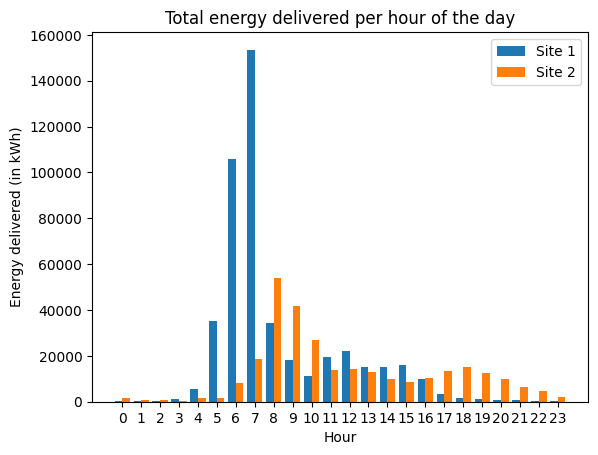

In [184]:
# Total energy delivered per hour of the day

x = np.arange(24)
y1 = df1_grouped_hour["kWhDelivered"].sum()
y2 = df2_grouped_hour["kWhDelivered"].sum()

fig, ax = plt.subplots()
ax.bar(x-0.2, y1, width=0.4, align="center")
ax.bar(x+0.2, y2, width=0.4, align="center")
ax.set_xlabel("Hour")
ax.set_ylabel("Energy delivered (in kWh)")
ax.set_title("Total energy delivered per hour of the day")
ax.set_xticks(x)
ax.legend(("Site 1", "Site 2"))

fig.show
save_plot(fig)

**5. Energy requested per hour of the day**

Based on the energy requested of sessions started per hour of the day <br><br>
NOTES: <br>
- kWhRequested data not available for all sessions
- Therefore the following plots/data is to be analyzed with caution  

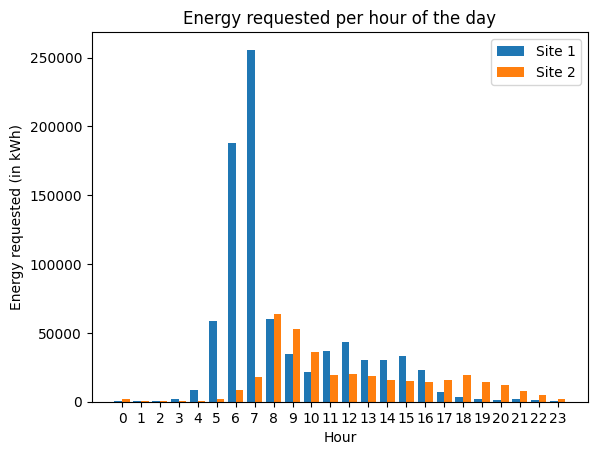

In [185]:
# Energy requested per hour of the day

x = np.arange(24)
y1 = df1_grouped_hour["kWhRequested"].sum()
y2 = df2_grouped_hour["kWhRequested"].sum()

fig, ax = plt.subplots()
ax.bar(x-0.2, y1, width=0.4, align="center")
ax.bar(x+0.2, y2, width=0.4, align="center")
ax.set_xlabel("Hour")
ax.set_ylabel("Energy requested (in kWh)")
ax.set_title("Energy requested per hour of the day")
ax.set_xticks(x)
ax.legend(("Site 1", "Site 2"))

fig.show
save_plot(fig)

NOTES: <br>
- Probably skewed by an outlier for Site 2 at 3am

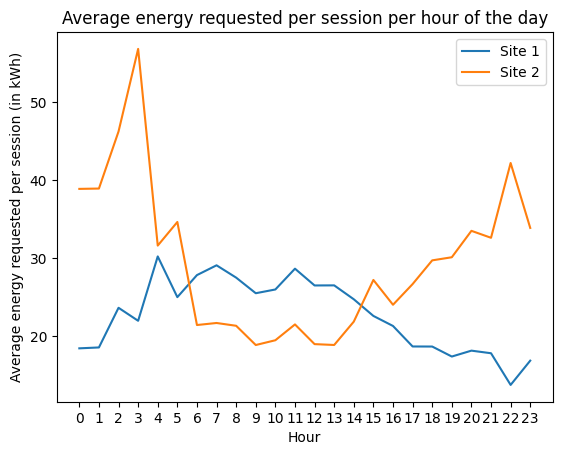

In [186]:
# Average energy requested per session per hour of the day

x = np.arange(24)
y1 = df1_grouped_hour["kWhRequested"].sum() / df1_grouped_hour["kWhRequested"].count()
y2 = df2_grouped_hour["kWhRequested"].sum() / df2_grouped_hour["kWhRequested"].count()

fig, ax = plt.subplots()
ax.plot(x, y1, label="Site 1")
ax.plot(x, y2, label="Site 2")
ax.set_title("Average energy requested per session per hour of the day")
ax.set_xlabel("Hour")
ax.set_ylabel("Average energy requested per session (in kWh)")
ax.set_xticks(x)
ax.legend()

fig.show
save_plot(fig)

# Patterns during the week

This section analyzes the patterns in the charging data that occur within a single day.
Therefore, the following topics are covered:
1. Number of sessions (per weekday)
2. Connection duration (per weekday)
3. Energy delivered (per weekday)

**1. Number of sessions per weekday**

Insights:
- Generally more sessions on weekdays than the weekend
- Larger difference between weekdays & weekend for Site1, possibly indicating commercial usage

Notes:
- REMINDER: Number of sessions of Site 1 DOES NOT EQUAL Number of sessions of Site 2

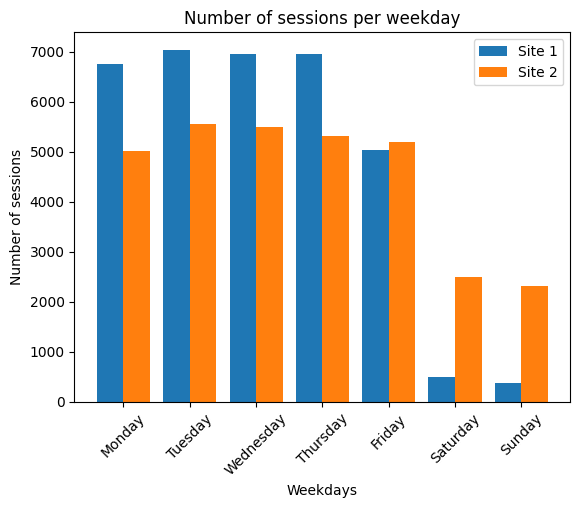

In [187]:
x = np.arange(len(weekdays))
y1 = df1_grouped_weekday.size()
y2 = df2_grouped_weekday.size()

fig, ax1 = plt.subplots()
ax1.bar(x-0.2, y1, width=0.4, align="center")
ax1.bar(x+0.2, y2, width=0.4, align="center")

ax1.set_title("Number of sessions per weekday")
ax1.set_xlabel("Weekdays")
ax1.set_xticks(x)
ax1.set_xticklabels(weekdays, rotation=45)
ax1.set_ylabel("Number of sessions")
ax1.legend(("Site 1", "Site 2"))

fig.show
save_plot(fig)

**2. Connection duration per weekday**

Notes:
- Why are there so many outliers in the boxplot for Site 2?
    - Connection duration indicates parking for up to a whole day (= 24 hours)
    - Possibly indication of higher rate of non-work related usage of Site 2

In [188]:
# Statistics for the connection duration per weekday
df1_grouped_weekday_statistics =  df1_grouped_weekday["connectionDuration"].describe()
df2_grouped_weekday_statistics =  df2_grouped_weekday["connectionDuration"].describe()

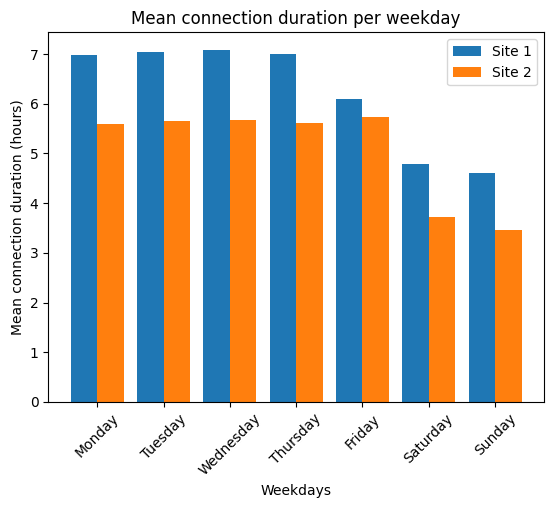

In [189]:
# Bar Charts plotting the mean connection duration per weekday
x = np.arange(len(weekdays))
y1 = df1_grouped_weekday_statistics["mean"]
y2 = df2_grouped_weekday_statistics["mean"]

fig, ax2 = plt.subplots()
ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Mean connection duration per weekday")
ax2.set_xlabel("Weekdays")
ax2.set_xticks(x)
ax2.set_xticklabels(weekdays, rotation=45)
ax2.set_ylabel("Mean connection duration (hours)")
ax2.legend(("Site 1", "Site 2"))

fig.show
save_plot(fig)

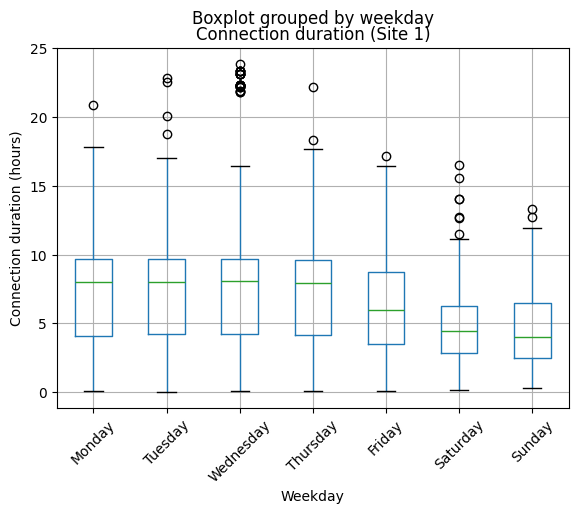

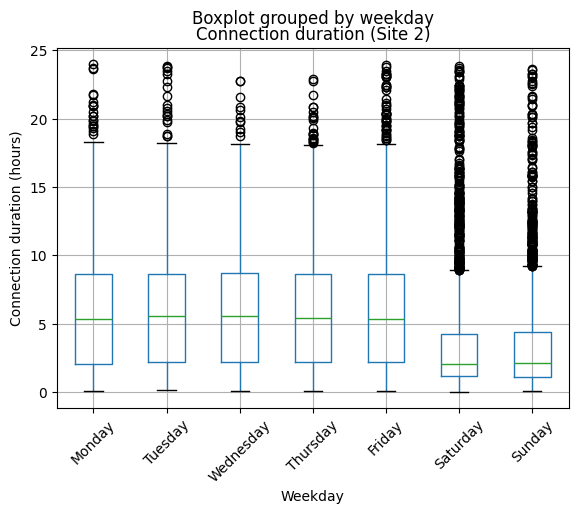

In [190]:
# Boxplots showing the average 25%, 50% and 75% marks of the connection durations per weekday
df1_connection_duration = df1[["weekday", "connectionDuration"]]
df2_connection_duration = df2[["weekday", "connectionDuration"]]

fig, ax3 = plt.subplots()
df1_connection_duration.boxplot(ax=ax3, by="weekday")
ax3.set_title("Connection duration (Site 1)")
ax3.set_xlabel("Weekday")
ax3.set_xticklabels(weekdays, rotation=45)
ax3.set_ylabel("Connection duration (hours)")
fig.show
save_plot(fig)

fig, ax4 = plt.subplots()
df2_connection_duration.boxplot(ax=ax4, by="weekday")
ax4.set_title("Connection duration (Site 2)")
ax4.set_xlabel("Weekday")
ax4.set_xticklabels(weekdays, rotation=45)
ax4.set_ylabel("Connection duration (hours)")

fig.show
save_plot(fig)


**3. Energy delivered per weekday**

Insights:
- Generally more energy delivered on weekdays than the weekend
- Larger difference between weekdays & weekend for Site 1, possibly indicating commercial usage

Notes:
- REMINDER: Number of sessions of & total energy delivered to  Site 1 DOES NOT EQUAL Number of sessions of & energy delivered to Site 2

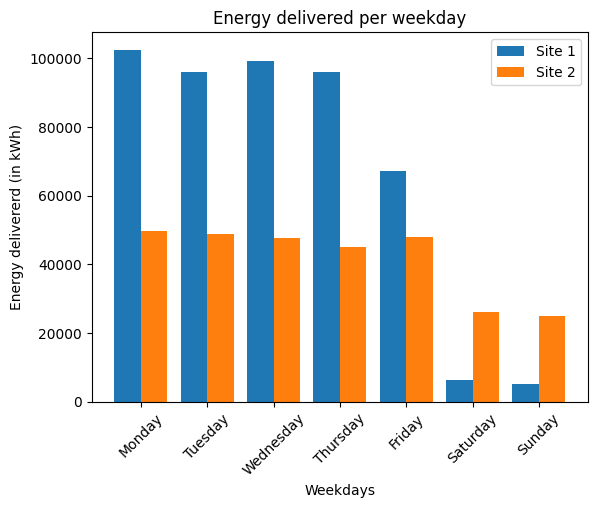

In [191]:
# Energy delivered per weekday

x = np.arange(len(weekdays))
y1 = df1_grouped_weekday["kWhDelivered"].sum()
y2 = df2_grouped_weekday["kWhDelivered"].sum()

fig, ax2 = plt.subplots()
ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Energy delivered per weekday")
ax2.set_xlabel("Weekdays")
ax2.set_xticks(x)
ax2.set_xticklabels(weekdays, rotation=45)
ax2.set_ylabel("Energy delivererd (in kWh)")
ax2.legend(("Site 1", "Site 2"))

fig.show
save_plot(fig)

# Patterns between months & within a year

This section analyzes the patterns in the charging data that occur within a single year or variations between months.
Therefore, the following topics are covered:
1. Number of sessions (per month)
2. Number of sessions (per individual month)
3. Energy delivered (per month)
4. Energy delivered per session (per month)

**1. Number of sessions per month**

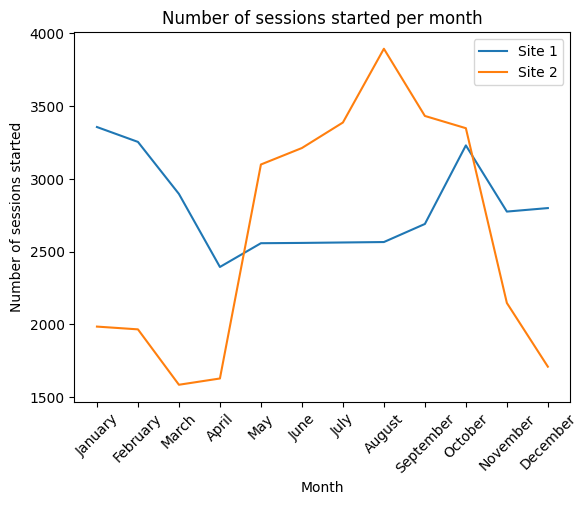

In [192]:
x = np.arange(len(months))
y1 = df1_grouped_month[["month"]].size()
y2 = df2_grouped_month[["month"]].size()

fig, ax = plt.subplots()
ax.plot(x, y1, label="Site 1")
ax.plot(x, y2, label="Site 2")
ax.set_xlabel("Month")
ax.set_ylabel("Number of sessions started")
ax.set_xticks(ticks=x, labels=months, rotation=45)
ax.set_title("Number of sessions started per month")
ax.legend()

fig.show
save_plot(fig)

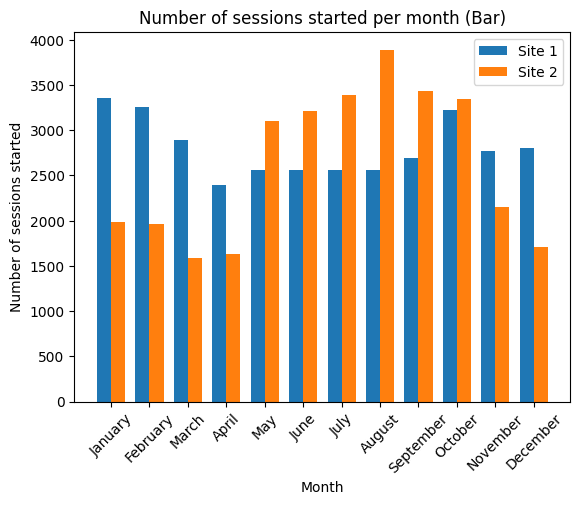

In [193]:
x = np.linspace(0,12,12)
y1 = df1_grouped_month[["month"]].size()
y2 = df2_grouped_month[["month"]].size()

# Show both sites together
fig, ax2 = plt.subplots()
ax2_y1 = ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2_y2 = ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Number of sessions started per month (Bar)")
ax2.set_xlabel("Month")
ax2.set_xticks(x)
ax2.set_xticklabels(months, rotation=45)
ax2.set_ylabel("Number of sessions started")
ax2.legend((ax2_y1, ax2_y2), ("Site 1", "Site 2"))
fig.show
save_plot(fig)

**2. Number of sessions per individual month**

C:\Users\Felix\AppData\Local\Temp\ipykernel_29432\1236705459.py:1: UserWarning: Converting to Period representation will drop timezone information.
  df1_single_months = df1.groupby(df1['connectionTime'].apply(lambda x: x.to_period('M'))).size()
C:\Users\Felix\AppData\Local\Temp\ipykernel_29432\1236705459.py:2: UserWarning: Converting to Period representation will drop timezone information.
  df2_single_months = df2.groupby(df2['connectionTime'].apply(lambda x: x.to_period('M'))).size()


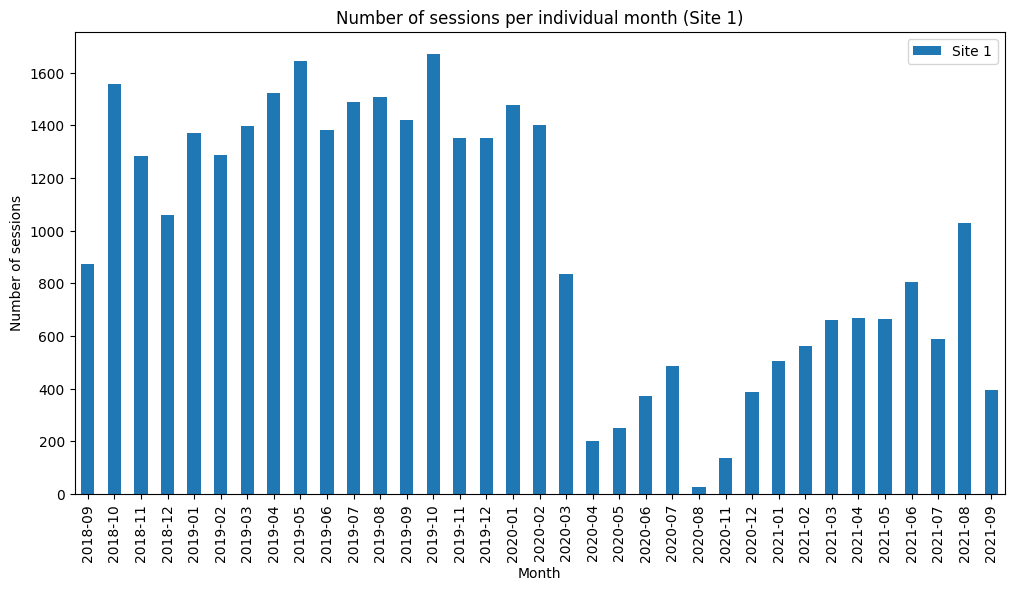

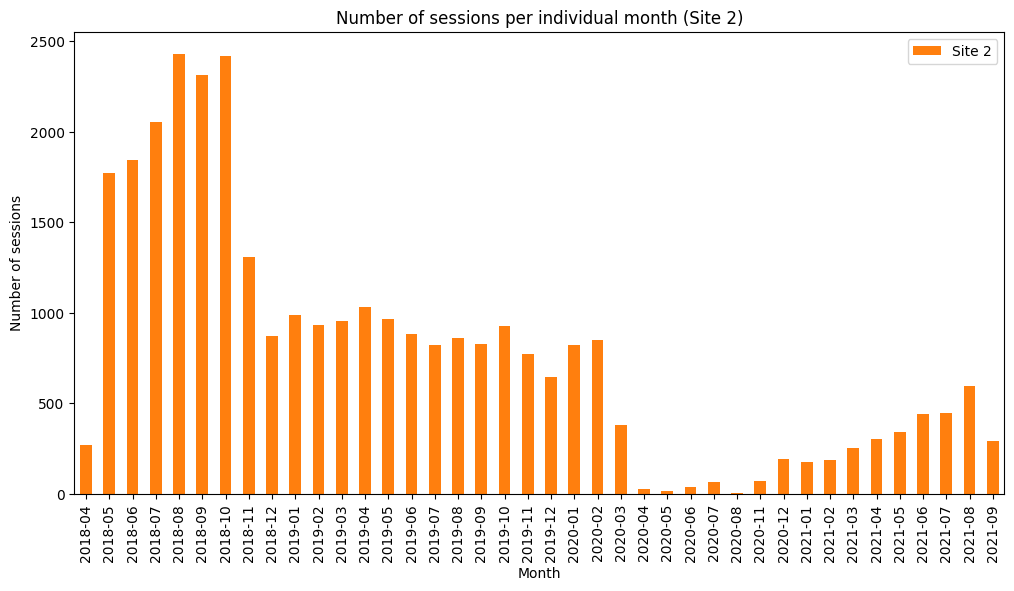

In [194]:
df1_single_months = df1.groupby(df1['connectionTime'].apply(lambda x: x.to_period('M'))).size()
df2_single_months = df2.groupby(df2['connectionTime'].apply(lambda x: x.to_period('M'))).size()


fig, ax = plt.subplots()
df1_single_months.plot(kind='bar', figsize=(12, 6), label="Site 1")
ax.set_xlabel("Month")
ax.set_ylabel("Number of sessions")
ax.set_title("Number of sessions per individual month (Site 1)")
ax.legend()
fig.show
save_plot(fig)

fig, ax = plt.subplots()
df2_single_months.plot(kind='bar', figsize=(12, 6), color="tab:orange", label="Site 2")
ax.set_xlabel("Month")
ax.set_ylabel("Number of sessions")
ax.set_title("Number of sessions per individual month (Site 2)")
ax.legend()
fig.show
save_plot(fig)

**3. Energy delivered per (aggregated) month**

Insights:
- Site 1:
    - Generally more energy delivered in winter/colder months (october - march)
    - Outlier for the month of July with the most energy delivered of any month

- Site 2:
    - Generally more energy delivered in summer/warmer months (may - october)

NOTES:
- Investigate outlier in July for Site 1 --> Duplicates have been removed

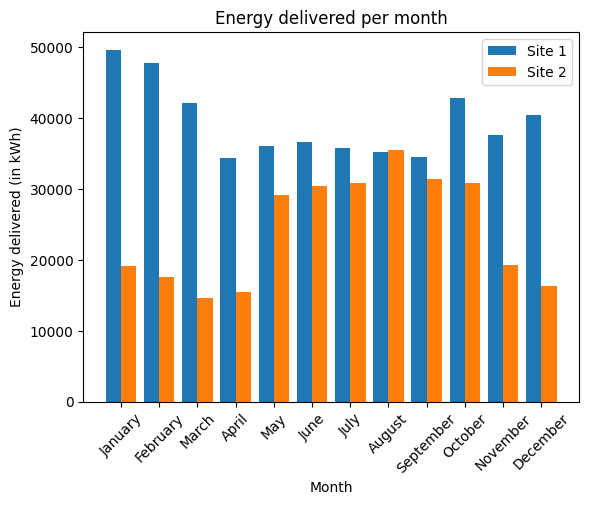

In [195]:
x = np.arange(len(months))
y1 = df1_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"]
y2 = df2_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"]

# Show both sites together
fig, ax2 = plt.subplots()
ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Energy delivered per month")
ax2.set_xlabel("Month")
ax2.set_xticks(x)
ax2.set_xticklabels(months, rotation=45)
ax2.set_ylabel("Energy delivered (in kWh)")
ax2.legend(("Site 1", "Site 2"))
fig.show
save_plot(fig)

**Energy delivered per session per month**

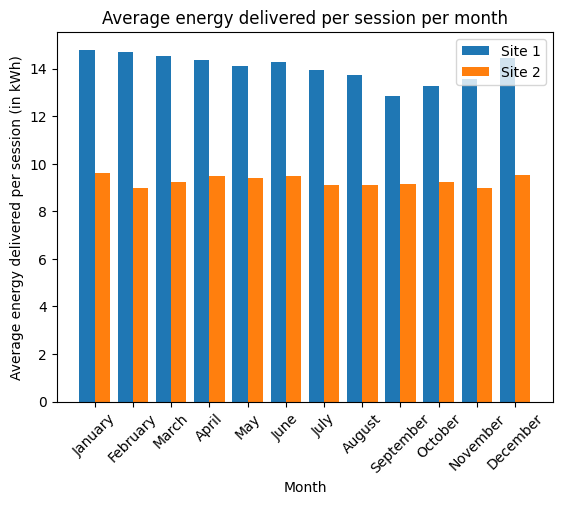

In [196]:
x = np.arange(len(months))
y1 = df1_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"] / df1_grouped_month[["month"]].size()
y2 = df2_grouped_month[["kWhDelivered"]].sum()["kWhDelivered"] / df2_grouped_month[["month"]].size()

# Show both sites together
fig, ax2 = plt.subplots()
ax2.bar(x-0.2, y1, width=0.4, align="center")
ax2.bar(x+0.2, y2, width=0.4, align="center")

ax2.set_title("Average energy delivered per session per month")
ax2.set_xlabel("Month")
ax2.set_xticks(x)
ax2.set_xticklabels(months, rotation=45)
ax2.set_ylabel("Average energy delivered per session (in kWh)")
ax2.legend(("Site 1", "Site 2"))
fig.show
save_plot(fig)
